In [1]:
def user():
    
    '''Function that asks for the user for values that will be used throughout the rest of the program.'''
    try: 
        population = int(input('What is the approximate population size of your city/town? ')) #Asks the user for the total population (number of individuals who can become suseptible.)
        daily_rise = int(input('What was the daily rise in number of cases in your area? ')) #Asks the user for the the number of cases (Thus the number of infectives in the first year)
        num_gen= int(input('How many days would you like to cycle through: ')) #The number of generations indicated how many data points the user wants.
    except:
        print('Error: Please enter numbers only and try again.')
        covid_model()
    high_or_low = input('Would you like the transmission rate to be a high or low estimate? Please enter "High" or "Low". ').capitalize() #Asks the user for what type of estimate they would like
    try:
        if high_or_low == 'Low': #if the user wants a low estimate
            low_estimate = {'England':0.8, 'Northen Ireland':0.9, 'Scotland':0.8, 'Wales':0.8} #low estimates for UK values
            country = input('What country in the UK is your town or city? ').capitalize() #answer used to select from the dictionary
            trans_rate = low_estimate[country] #pulls the estimate from the dictionary
            return trans_rate, country, num_gen, daily_rise, population
        
        else: # For high estimate
            high_estimate={'England':1.0, 'Northen Ireland':1.1, 'Scotland':1.0, 'Wales':1.0} #high estimates for UK values
            country = input('What country in the UK is your town or city? ').capitalize() #answer used to select from the dictionary
            trans_rate = high_estimate[country] #pulls the estimate from the dictionary
            return trans_rate, country, num_gen, daily_rise, population
    except:
        print('Error: {} is not a valid entry. Please enter a country in the UK and try again. Enter all lower case.'.format(country))
        covid_model()

In [2]:
def calculations(trans_rate, country, num_gen, daily_rise, population):
    
    '''Function to Calculate the number of individuals who gain immunity each generation without the inclusion of a vaccine.'''
    
    
    print('The transmission rate for {} is {}. '.format(country, trans_rate)) #informs the user of the information they did not directly imput
    mr= 0.036 #the UK mortality rate for the corona virus
    zero_death = (daily_rise*mr) #number of individuals that died from the cases the user provided (at time zero)
    zero_immunity = daily_rise - zero_death #number of individuals that gained immunity from the cases the user provides (at time zero)
    #length= int(num_gen) + 1 #the number of generations the user provided +1 so that the for program goes through the required amount of times
    gen = range(1, num_gen + 1) #list of all generations
    total_cases = [daily_rise] #a list of all the cases - that for now only includes the daily rise
    total_immunity = [zero_immunity] #list of number of individuals immune each generation
    total_death = [zero_death] #list of number of individuals died each generation
    total_generation= [0] #creates a list of the generation numbers
    immune_list = [zero_immunity] #Sum of total immunity each generation
    immune_percentage=[]
    gen_death = [0]
    death_percentage = []
    infections = [zero_immunity]
    infect_percentage =[]
    
    import collections
    infectious = collections.deque(maxlen=3)
    infectious.append(daily_rise)
   
    for t in gen: #Sequences through all generations
        
        sum_cases = sum(total_cases) #sums all the number of cases
        
        if daily_rise == 0: #if total number of cases is larger than the population or there are no more cases
            
            print('All of the population has been processed.')
            recovered = sum(total_immunity) #number of people who recovered
            total_infectious = sum(infectious)
            I= total_infectious #number of people who are infectious #number of people who are infectious
            portion_infected = I/population #the portion of the individuals who 
            not_in_population = (recovered + sum(total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*trans_rate #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            infectious.append(new_cases)
            total_cases.append(new_cases)#adds to the total number of cases
            
            death = (new_cases)*0.036 #portion of those infected who died
            total_death.append(death) #adds to the total number of deaths
            immunity = new_cases - death #individuals who are immune that generation
            total_immunity.append(immunity) #adds to the total number of immune
            print('On day {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                               daily_rise, immunity, death))
            print('After {} day(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity))) 
            daily_rise = new_cases
            print(' ')
            immune_list.append(sum(total_immunity))
            break
           
        else:
            recovered = sum(total_immunity) #number of people who recovered
            total_infectious = sum(infectious)
            I= total_infectious #number of people who are infectious #number of people who are infectious
            portion_infected= I/population #the portion of the individuals who 
            not_in_population = (recovered + sum(total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*trans_rate #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            infectious.append(new_cases)
            if new_cases <= 0.5:
                pass
            else:
                total_generation.append(t) #adds a number to the total generation
                total_cases.append(new_cases) #adds to the total number of cases
                death = (new_cases)*0.036 #portion of those infected who died

                if death < 1:
                    total_death.append(1) #adds to the total number of deaths
                else:
                    total_death.append(death) #adds to the total number of deaths
                immunity = new_cases - death #individuals who are immune that generation

                if immunity < 1:
                        total_immunity.append(1) 
                else:
                    total_immunity.append(immunity) #adds to the total number of immune
                print('On day {}, there were {:.0f} new cases. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                 immunity, death))
                print('After {} day(s) of COVID; there are {:.0f} total cases across the population and a total {:.0f} number of people will be immune.'.format(t, sum(total_cases),
                                                                                                                                                                  sum(total_immunity))) 
                daily_rise = new_cases
                print(' ')
                immune_list.append(sum(total_immunity))
                infections.append(sum(total_cases))
                gen_death.append(sum(total_death))
    #The percentage is calculated and added to the list
    
    for immune in immune_list:
        percentage=immune/population*100
        immune_percentage.append(percentage)
    for infect in infections:
        inf_percentage = infect/population*100
        infect_percentage.append(inf_percentage)
    for d in gen_death:
        death_p = d/population*100
        death_percentage.append(death_p)
    
    return total_cases, total_immunity, total_death, total_generation, immune_list, immune_percentage, infect_percentage, death_percentage

In [3]:
def table(total_cases, total_immunity, total_death, total_generation, immune_list, immune_percentage,infect_percentage, death_percentage):
    
    '''Function to display and save to a file the data to be displayed in a graph'''
    
    
    #imports a software libraries needed to complete the program
    
    import pandas as pd
    import numpy as np
    
    #creates a dictionary of the number of generations vs the sum of the individuals with immunity
    
    data = {
    'Number of Days': total_generation,
    'Number of Immune Individuals': immune_percentage,
    'Number of infections': infect_percentage,
    'Number of deaths': death_percentage
        }
    
    #prints the information in data to a table
    table = pd.DataFrame.from_dict(data,orient='index')
    table = table.transpose()
    print(table)
    numpy_array = table.to_numpy()
    print(' ')
    
    decide = input('Do you want to save the report to a file? Enter yes or no: ').capitalize() #ask if they want to save a file
    if decide == 'Yes': #If they input yes
        #currently only input that works is Gen
        print('Your file name will be "ImmunityTable"') 

        how = input('How would you like your file to be opened? Enter append or write: ').capitalize() #ask how they want the data to be saved

            #confirm_how = input('Confirm editing format with yes or no: ').capitalize() #ask for confirmation

            #if confirm_how == 'No':#if enter no
               # how = input('How would you like your file to be opened? Enter append or write: ') #allowed to enter again

        if how == 'Write': #write the following into the provided file
            file = open('ImmunityTable', 'w')
            np.savetxt('ImmunityTable' , numpy_array, fmt = "%d")
            file.close()
            print('I have successfully saved the data under "ImmunityTable". The program is complete.')

        elif how == 'Append': #append the following into the provided file
            file = open('ImmunityTable', 'a')
            np.savetxt('ImmunityTable' , numpy_array, fmt = "%d")
            file.close()
            print('I have successfully saved the data under "ImmunityTable" The program is complete.')
            
        else:
            print('Error: I do not understand command "{}". Please enter either "Write" or "Append" and try again.'.format(how))
            covid_model()
    
    else:#if the user doesn't want to save a file.
        print('Okay, I will not save the data. The program is complete.')

In [4]:
def graph(total_cases,total_immunity,total_death, total_generation,immune_list, immune_percentage, infect_percentage, death_percentage):
    '''Function which prints a graph of established data'''
    
    import pandas as pd
    
    tdf= pd.read_csv("ImmunityTable",sep=" ") #reads file to collect the data
    tdf.shape
    tdf=pd.read_csv("ImmunityTable",sep=" ",names=["Number of days", "Immunity (as percentage of the population)", "Infections", "Deaths"]) #creates headers for the graph
    tdf.head()
    tdf.plot(x="Number of days",y=["Immunity (as percentage of the population)","Deaths","Infections"]) #plots the data

In [5]:
def vac_user():
    
    '''Function to ask the user for the vaccine data and efficiency, and calculate how many people become immune from 
    the vaccine per generation'''  
    
    vac_name = input("What is the vaccine used? ")
    efficiency =input(("What is the efficiency of the vaccine in percentage? "))
    effi_dec = (int(efficiency)/100)
    vac_people = int(input(("How many people are being vaccinated in your city/town per day? ")))
    vac_immunity= (vac_people *effi_dec) #calculates how many people are becoming immune from the vaccine per generation
    return vac_immunity

In [6]:
def vac_calculations(trans_rate, country, num_gen, daily_rise, population):
    
    
    '''Function to Calculate the number of individuals who gain immunity each generation without the inclusion of a vaccine.'''
    vac_immunity = vac_user()
    
    print('The transmission rate for {} is {}. '.format(country, trans_rate)) #informs the user of the information they did not directly imput
    mr= 0.036 #the UK mortality rate for the corona virus
    zero_death = (daily_rise*mr) #number of individuals that died from the cases the user provided (at time zero)
    zero_immunity = daily_rise - zero_death #number of individuals that gained immunity from the cases the user provides (at time zero)
    #length= int(num_gen) + 1 #the number of generations the user provided +1 so that the for program goes through the required amount of times
    gen = range(1, num_gen + 1) #list of all generations
    vac_total_cases = [daily_rise] #a list of all the cases - that for now only includes the daily rise
    vac_total_immunity = [zero_immunity] #list of number of individuals immune each generation
    vac_total_death = [zero_death] #list of number of individuals died each generation
    vac_total_generation= [0] #creates a list of the generation numbers
    total_vac = [0]
    vac_immune_list = [zero_immunity] #Sum of total immunity each generation
    vac_immune_percentage=[]
    vac_gen_death = [0]
    vac_death_percentage = []
    vac_infections = [zero_immunity]
    vac_infect_percentage =[]
    immune_from_vaccine = [0]
    percent_immune_vaccine=[]
    
    import collections
    infectious = collections.deque(maxlen=3)
    infectious.append(daily_rise)
   
    for t in gen: #Sequences through all generations
        
        sum_cases = sum(vac_total_cases) #sums all the number of cases
        
        if daily_rise == 0: #if total number of cases is larger than the population or there are no more cases
            
            print('All of the population has been processed.')
            recovered = sum(vac_total_immunity) #number of people who recovered
            total_infectious = sum(vac_infections)
            I= total_infectious #number of people who are infectious #number of people who are infectious
            portion_infected = I/population #the portion of the individuals who 
            not_in_population = (recovered + sum(vac_total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*trans_rate #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            infectious.append(new_cases)
            vac_total_cases.append(new_cases)#adds to the total number of cases
            
            death = (new_cases)*0.036 #portion of those infected who died
            vac_total_death.append(death) #adds to the total number of deaths
            immunity = new_cases - death #individuals who are immune that generation
            vac_total_immunity.append(immunity) #adds to the total number of immune
            print('On day {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                               daily_rise, immunity, death))
            print('After {} day(s) of COVID, {:.0f} number of people will be immune.'.format(t,sum(total_immunity))) 
            daily_rise = new_cases
            print(' ')
            immune_list.append(sum(vac_total_immunity))
            break
           
        else:
            recovered = sum(vac_total_immunity) #number of people who recovered
            total_infectious = sum(vac_infections)
            I= total_infectious #number of people who are infectious #number of people who are infectious
            portion_infected= I/population #the portion of the individuals who 
            not_in_population = (recovered + sum(vac_total_death)) #sum of the people no longer suseptible either immune or dead
            S = (population-not_in_population) #removes those who are not suseptible from the population
            portion_S = (S/population) #portion of the people suseptible
            new_cases = portion_S*I*trans_rate #number of new cases: portion of individuals in the population who are suseptible * infected (contagious) * transmission rate
            infectious.append(new_cases)
            if new_cases <= 0.5:
                pass
            else:
                vac_total_generation.append(t) #adds a number to the total generation
                vac_total_cases.append(new_cases) #adds to the total number of cases
                death = (new_cases)*0.036 #portion of those infected who died

                if death < 1:
                    vac_total_death.append(1) #adds to the total number of deaths
                else:
                    vac_total_death.append(death) #adds to the total number of deaths
                vaccine_gen = vac_immunity
                total_vac.append(vaccine_gen)
                immunity = new_cases + vaccine_gen - death #individuals who are immune that generation

                if immunity < 1:
                        vac_total_immunity.append(1) 
                else:
                    vac_total_immunity.append(immunity) #adds to the total number of immune
                print('On day {}, there were {:.0f} new cases. {:.0f} people became immune, and {:.0f} died.'.format(t, new_cases, 
                                                                                                                 immunity, death))
                print('After {} day(s) of COVID; there are {:.0f} total cases across the population and a total {:.0f} number of people will be immune.'.format(t, sum(vac_total_cases),
                                                                                                                                                                  sum(vac_total_immunity))) 
                daily_rise = new_cases
                print(' ')
                vac_immune_list.append(sum(vac_total_immunity))
                vac_infections.append(sum(vac_total_cases))
                vac_gen_death.append(sum(vac_total_death))
                immune_from_vaccine.append(sum(total_vac))
    #The percentage is calculated and added to the list
    
    for immune in vac_immune_list:
        percentage= (immune/population)*100
        vac_immune_percentage.append(percentage)
    for infect in vac_infections:
        inf_percentage = (infect/population)*100
        vac_infect_percentage.append(inf_percentage)
    for d in vac_gen_death:
        death_p = (d/population)*100
        vac_death_percentage.append(death_p)
    for v in immune_from_vaccine:
        vaccine_p = (v/population)*100
        percent_immune_vaccine.append(vaccine_p)
    
    return vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine

In [ ]:
trans_rate, country, num_gen, daily_rise, population = user()
vac_calculations(trans_rate, country, num_gen, daily_rise, population)




In [13]:
def vac_table(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine):
    '''Function to display and save to a file the data to be displayed in a graph'''
 

    
    #imports a software libraries needed to complete the program
    import pandas as pd
    import numpy as np
    
    #creates a dictionary of the number of generations vs the sum of the individuals with immunity
    data = {
    'Number of Days': vac_total_generation,
    'Number of immune individuals (Vaccine Included)': vac_immune_percentage,
    'Number of Infections': vac_infect_percentage,
    'Number of Deaths': vac_death_percentage,
    'Number of immune because of the vaccine': percent_immune_vaccine
        }
    
    #prints the information in data to a table
    table = pd.DataFrame(data)
    print(vac_table)
    numpy_array = table.to_numpy()
    print(' ')
    
    decide = input('Do you want to save the report to a file? Enter yes or no: ').capitalize() #ask if they want to save a file
    if decide == 'Yes': #If they input yes
        #currently only input that works is Gen
        print('Your file name will be "VacImmunityTable"') 

        how = input('How would you like your file to be opened? Enter append or write: ').capitalize() #ask how they want the data to be saved

            #confirm_how = input('Confirm editing format with yes or no: ').capitalize() #ask for confirmation

            #if confirm_how == 'No':#if enter no
               # how = input('How would you like your file to be opened? Enter append or write: ') #allowed to enter again

        if how == 'Write': #write the following into the provided file
            file = open('VacImmunityTable', 'w')
            np.savetxt('VacImmunityTable' , numpy_array, fmt = "%d")
            file.close()
            print('I have successfully saved the data under "VacImmunityTable". The program is complete.')

        elif how == 'Append': #append the following into the provided file
            file = open('VacImmunityTable', 'a')
            np.savetxt('VacImmunityTable' , numpy_array, fmt = "%d")
            file.close()
            print('I have successfully saved the data under "VacImmunityTable" The program is complete.')
            
        else:
            print('Error: I do not understand command "{}". Please enter either "Write" or "Append" and try again.'.format(how))
            vac_graph(total_cases,vac_total_immunity,total_death, total_generation,vac_immune_list, vac_immune_percentage)
    
    else:#if the user doesn't want to save a file.
        print('Okay, I will not save the data. The program is complete.')

In [17]:
def vac_graph(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine):
    '''Function which prints a graph of established data'''
    
    import pandas as pd
    
    tdf= pd.read_csv("VacImmunityTable",sep=" ") #reads file to collect the data
    tdf.shape
    tdf=pd.read_csv("VacImmunityTable",sep=" ",names=["Number of days", "Number of Immune individuals (Vaccine Included)", "Number of Infections", "Number of Deaths", 'Number of immune because of the vaccine']) #creates headers for the graph
    tdf.head()
    tdf.plot(x="Number of days",y= ["Number of Immune individuals (Vaccine Included)", "Number of Infections", "Number of Deaths", 'Number of immune because of the vaccine'])

In [18]:
def covid_model():
    trans_rate, country, num_gen, daily_rise, population = user()
    total_cases,total_immunity,total_death, total_generation, immune_list,immune_percentage, infect_percentage, death_percentage = calculations(trans_rate, country, num_gen, daily_rise, population)
    table(total_cases,total_immunity,total_death, total_generation,immune_list,immune_percentage, infect_percentage, death_percentage)
    graph(total_cases,total_immunity,total_death, total_generation,immune_list,immune_percentage, infect_percentage, death_percentage)
    vac_decide = input('Do you want to run the vaccine simulation with the same values? Enter yes or no: ').capitalize()
    if vac_decide == 'Yes':
        
        vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine = vac_calculations(trans_rate, country, num_gen, daily_rise, population)
        vac_table(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine)
        vac_graph(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine)
    else:
        trans_rate, country, num_gen, daily_rise, population = user()
        vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine = vac_calculations(trans_rate, country, num_gen, daily_rise, population)
        vac_table(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine)
        vac_graph(vac_total_cases, vac_total_immunity, vac_total_death, vac_total_generation, vac_immune_list, vac_immune_percentage, vac_infect_percentage, vac_death_percentage, percent_immune_vaccine)

What is the approximate population size of your city/town? 5000000
What was the daily rise in number of cases in your area? 754
How many days would you like to cycle through: 50
Would you like the transmission rate to be a high or low estimate? Please enter "High" or "Low". high
What country in the UK is your town or city? scotland
The transmission rate for Scotland is 1.0. 
On day 1, there were 754 new cases. 727 people became immune, and 27 died.
After 1 day(s) of COVID; there are 1508 total cases across the population and a total 1454 number of people will be immune.
 
On day 2, there were 1507 new cases. 1453 people became immune, and 54 died.
After 2 day(s) of COVID; there are 3015 total cases across the population and a total 2907 number of people will be immune.
 
On day 3, there were 3013 new cases. 2905 people became immune, and 108 died.
After 3 day(s) of COVID; there are 6029 total cases across the population and a total 5812 number of people will be immune.
 
On day 4, ther

Do you want to save the report to a file? Enter yes or no: yes
Your file name will be "ImmunityTable"
How would you like your file to be opened? Enter append or write: write
I have successfully saved the data under "ImmunityTable". The program is complete.
Do you want to run the vaccine simulation with the same values? Enter yes or no: yes
What is the vaccine used? oxford
What is the efficiency of the vaccine in percentage? 95
How many people are being vaccinated in your city/town per day? 100000
The transmission rate for Scotland is 1.0. 
On day 1, there were 727 new cases. 95701 people became immune, and 26 died.
After 1 day(s) of COVID; there are 1481 total cases across the population and a total 96427 number of people will be immune.
 
On day 2, there were 2165 new cases. 97087 people became immune, and 78 died.
After 2 day(s) of COVID; there are 3646 total cases across the population and a total 193515 number of people will be immune.
 
On day 3, there were 5627 new cases. 100424 

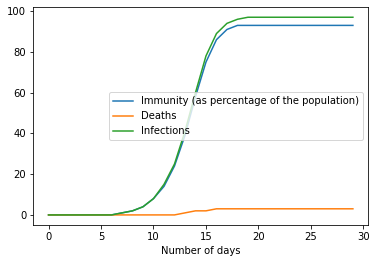

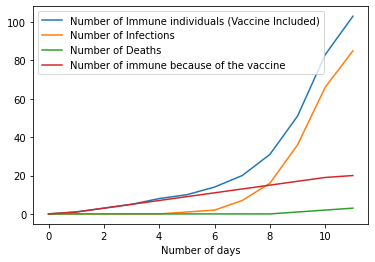

In [19]:
covid_model()